# EDA: Home Credit Default Risk
### Spencer Owens
### 5/1/2023

## Table of Contents
<br><a href='#1'>1. Introduction</a>
<br><a href='#2'>2. Setup</a>
<br><a href='#3'>3. Read in Data</a>
<br><a href='#4'>4. Missing Values</a>
<br><a href='#5'>5. Application Data</a>
<br><a href='#6'>6. Correlations</a>
<br><a href='#7'>7. Bureau Data</a>
<br><a href='#8'>8. Bureau Balance Data</a>
<br><a href='#9'>9. Credit Card Balance Data</a>
<br><a href='#10'>10. POS Cash Balance Data</a>
<br><a href='#11'>11. Previous Application Data</a>
<br><a href='#12'>12. Installments Payments Data</a>
<br><a href='#13'>13. Conclusion</a>

# <a id='1'>1. Introduction</a>

Home Credit makes loans to the underbanked. Making these loans involves the risk that
loans may be granted to clients who have difficulty repaying them. Home Credit is
hoping to mitigate this risk by using alternative data and statistical methods to improve
their model for approval decisions. Doing so will allow Home Credit to extend more
loans with a greater likelihood of being paid back, leading to more revenue.
Home Credit has provided historical data on clients’ applications, financial information,
and repayment histories. Success of a model will be measured by its ability to predict,
based on applications and financial information, if a client will miss at least one payment
early in the life of the loan. We will use the provided data to build a classification model;
our target (known in the data as the column 'TARGET') will be a binary indication of whether the client has a missed payment.



 # <a id='2'>2. Setup</a>

In [11]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import random
import cufflinks as cf
init_notebook_mode(connected=True)
# cf.go_offline()

path = '../CapstoneProject/home-credit-default-risk/'

In [12]:
# List files available
print(os.listdir(path))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


 # <a id='3'>3. Read in Data</a>

In [13]:
# Training data
app_train = pd.read_csv(path + 'application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Testing data features
app_test = pd.read_csv(path + 'application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Testing data has one less column because it lacks the target variable.

In [15]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

# <a id='4'>4. Missing Values</a>

Making the call here to handle missing values early for a better EDA.

In [16]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

This dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


The dataset has a lot of missing values. I have come across models that utilize Gradient Boosted Machines and can handle missing values without issue. For now though, I will impute missing values with the mean or ignore records with missing data.

# <a id='5'>5. Application Data</a>

In [18]:
temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

Only about 8% of recipients miss a loan payment.

In [19]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [20]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [21]:
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


We'll use one hot encoding for categorical variables with more than 2 categories to avoid accidentally ascribing meaning to the randomly assigned labels.

In [23]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [24]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Above we have aligned the training to fit the test data. The discrepancy would occur where not all categories available are represented in the testing data. We can see that in app_test gender, income_type, family_status have one less category than in app_train.

In [25]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [26]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

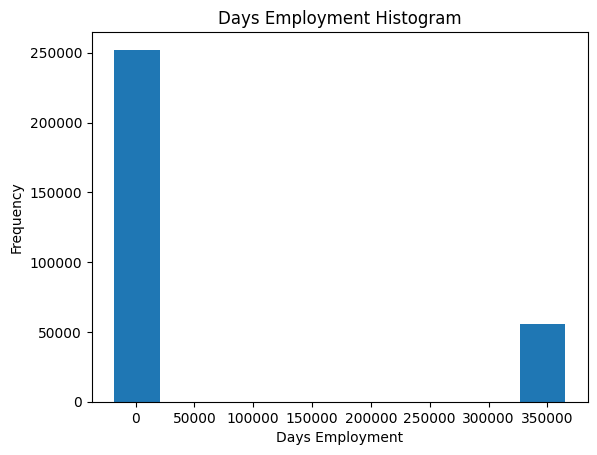

In [27]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Pretty strange. We can see that while most of the values here are negative, a little over 50k records have the value of exactly 365243 days. According to the contests organizers this number was meant to represent infinity or an unknown amount of time.

In [28]:
# Calculate respective default rates
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Non-anomalies: %0.2f%% default rate' % (100 * non_anom['TARGET'].mean()))
print('Anomalies: %0.2f%% default rate' % (100 * anom['TARGET'].mean()))


Non-anomalies: 8.66% default rate
Anomalies: 5.40% default rate


Racords with Anomalous Days Employment data default less.

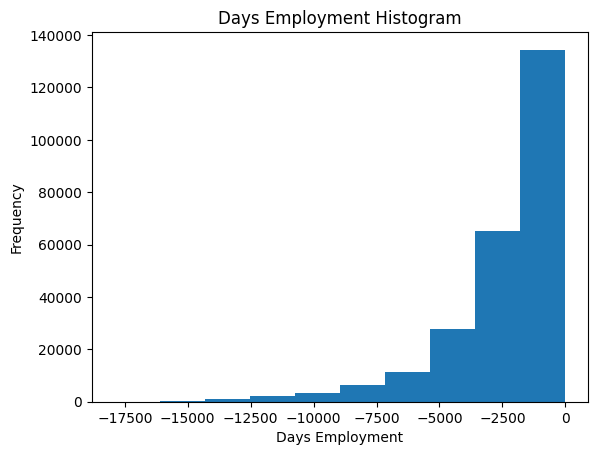

In [29]:
# Anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [30]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


A lot of these records have long-term employment anomaly.

# <a id='6'>6. Correlations</a>

In [31]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(25))
print('\nMost Negative Correlations:\n', correlations.head(25))

Most Positive Correlations:
 OCCUPATION_TYPE_Low-skill Laborers                   0.027591
FLAG_WORK_PHONE                                      0.028524
ORGANIZATION_TYPE_Self-employed                      0.029139
NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                   

This is maybe the most useful part of my data exploration. Finding correlations with the target variable will be the primary factor influencing feature engineering later. We can see that ext_sources 1, 2, and 3 have the highest negative correlations--meaning defaults go down when they go up. Age and length of employment have the highest positive correlations, though not nearly as strong as the ext_sources.

In [32]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

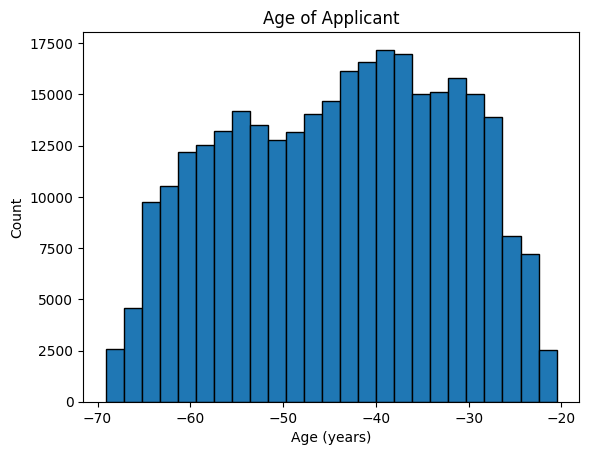

In [33]:
# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Applicant'); plt.xlabel('Age (years)'); plt.ylabel('Count');

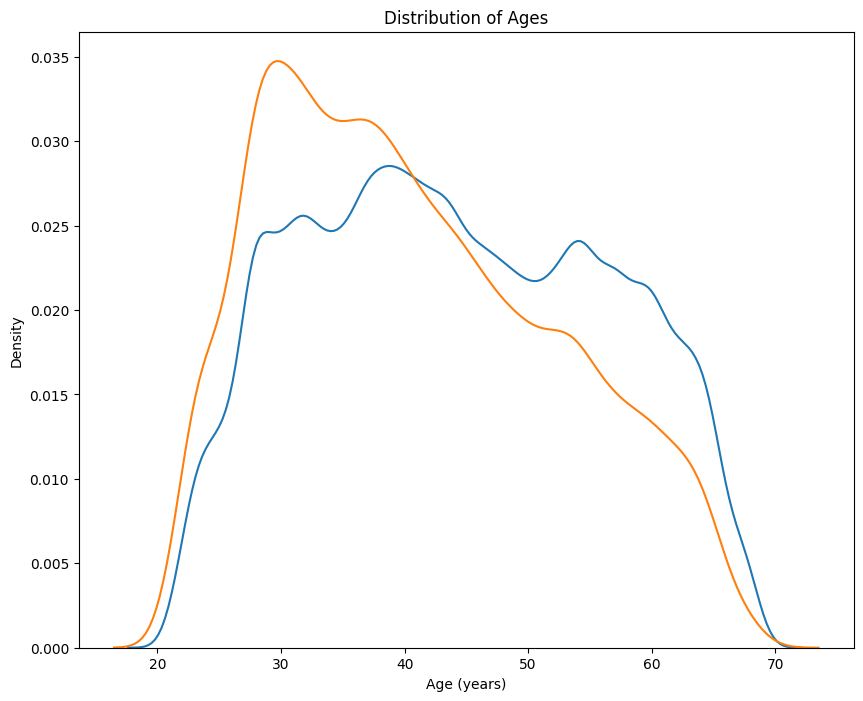

In [34]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Younger applicants have a higher failure to repay rate.

In [35]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [36]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


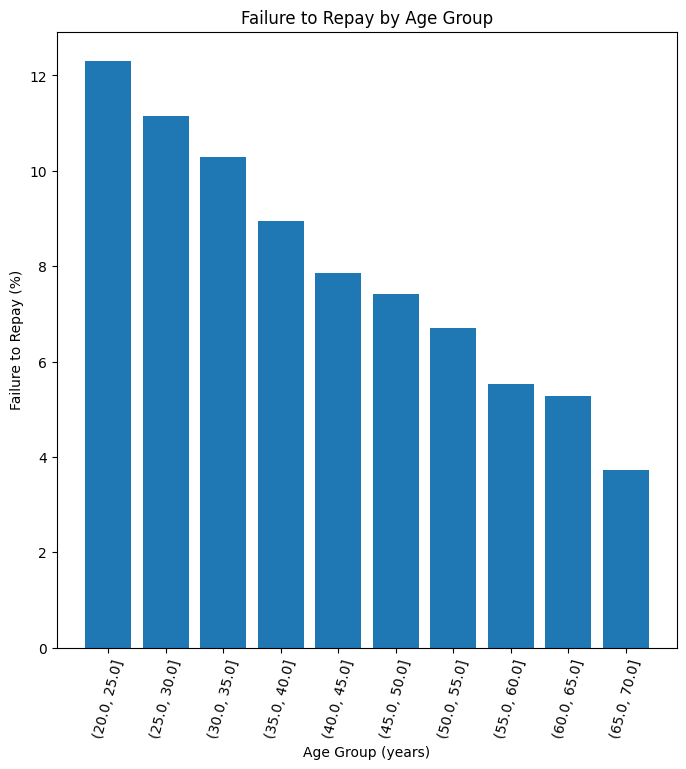

In [37]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Age appears inversely correlated to likelihood of failure to repay loan.

In [38]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


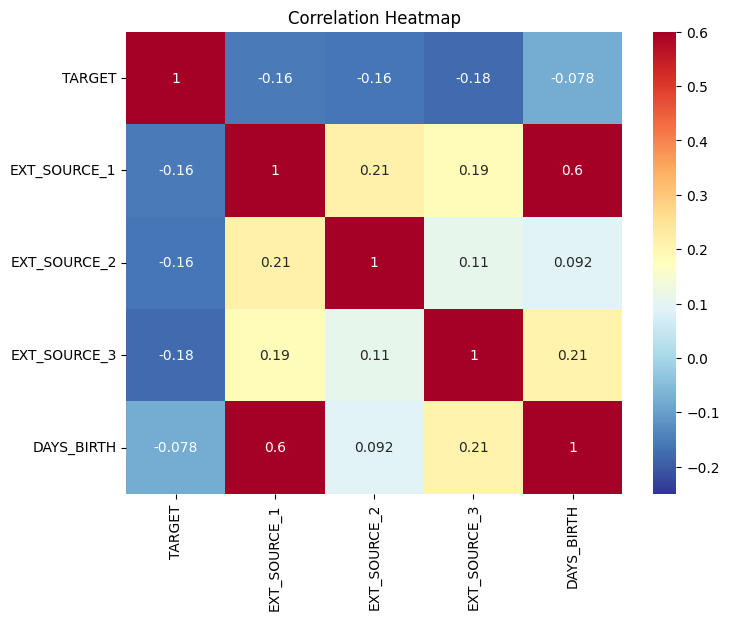

In [39]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Not all that insightful, but it is interesting that ext_source_1 is so highly correlated with age.

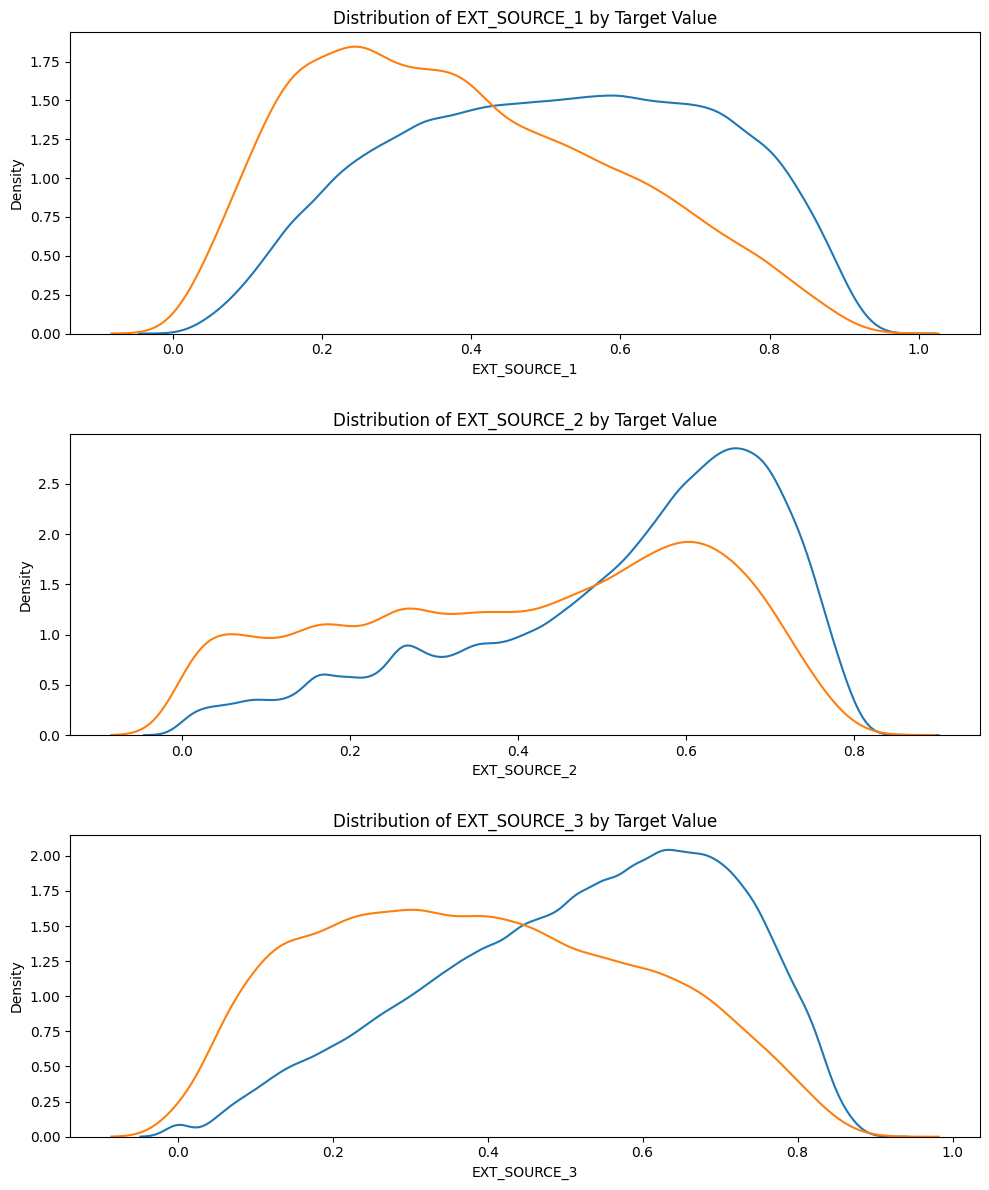

In [40]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

The values of ext_sources were lower those who failed to repay in all three cases.

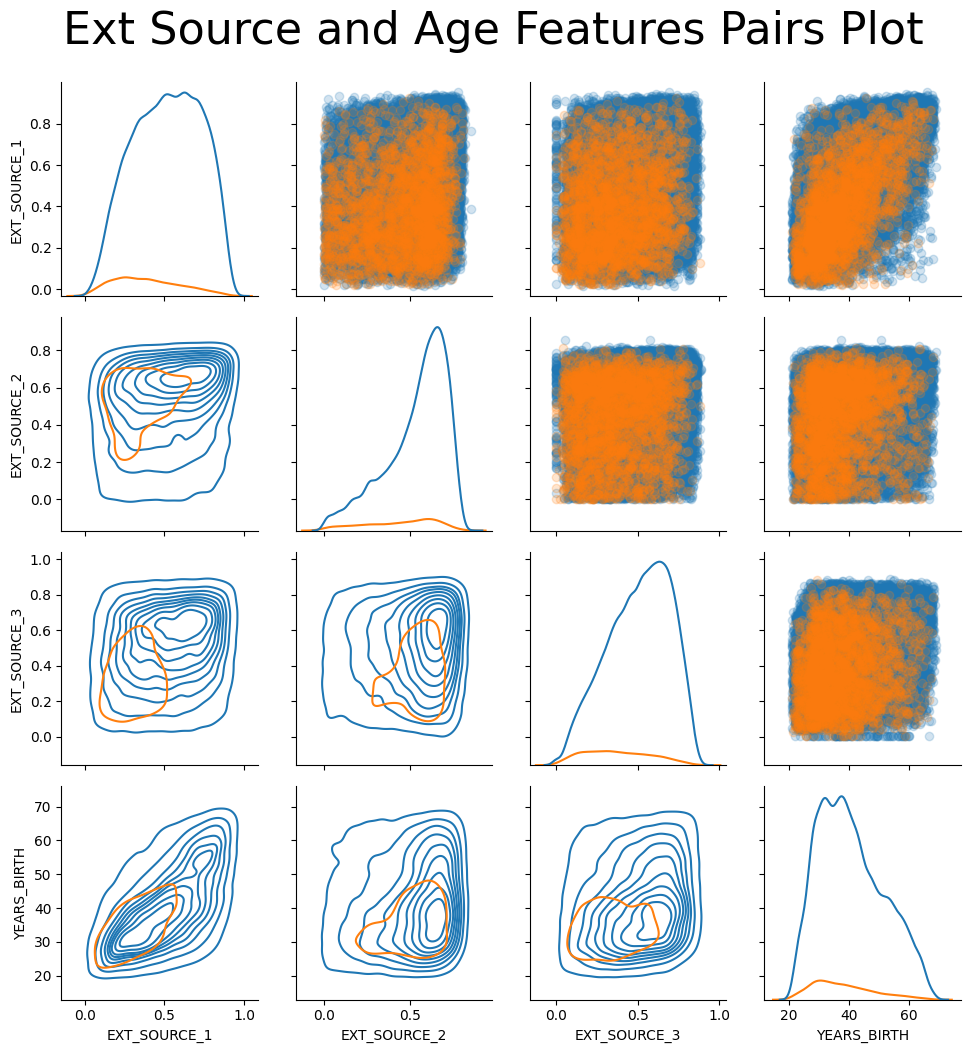

In [41]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = 'rocket');

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

As mentioned before, somewhat linear relationship between ext_source_1 and years_birth.

# <a id='7'>7. Bureau Data</a>

In [42]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [43]:
bureau.shape

(1716428, 17)

In [44]:
# Add target column to data
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")

In [45]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in bureau:
    if bureau[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(bureau[col].unique())) <= 2:
            # Train on the training data
            le.fit(bureau[col])
            # Transform both training and testing data
            bureau[col] = le.transform(bureau[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
bureau = pd.get_dummies(bureau)

print('Training Features shape: ', bureau.shape)

0 columns were label encoded.
Training Features shape:  (1716428, 38)


In [46]:
# Find correlations with the target and sort
bureau_correlations = bureau.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', bureau_correlations.tail(10))
print('\nMost Negative Correlations:\n', bureau_correlations.head(10))

Most Positive Correlations:
 CREDIT_ACTIVE_Sold         0.005299
AMT_CREDIT_SUM_OVERDUE     0.006253
CREDIT_TYPE_Credit card    0.020331
DAYS_CREDIT_ENDDATE        0.026497
CREDIT_TYPE_Microloan      0.037583
DAYS_ENDDATE_FACT          0.039057
DAYS_CREDIT_UPDATE         0.041076
CREDIT_ACTIVE_Active       0.042045
DAYS_CREDIT                0.061556
TARGET                     1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 CREDIT_ACTIVE_Closed                        -0.042647
CREDIT_TYPE_Consumer credit                 -0.020315
CREDIT_TYPE_Mortgage                        -0.010892
CREDIT_TYPE_Car loan                        -0.010724
AMT_CREDIT_SUM                              -0.010606
SK_ID_BUREAU                                -0.009018
AMT_CREDIT_SUM_LIMIT                        -0.005990
CREDIT_CURRENCY_currency 2                  -0.003271
SK_ID_CURR                                  -0.003024
CREDIT_TYPE_Loan for business development   -0.002116
Name: TARGET

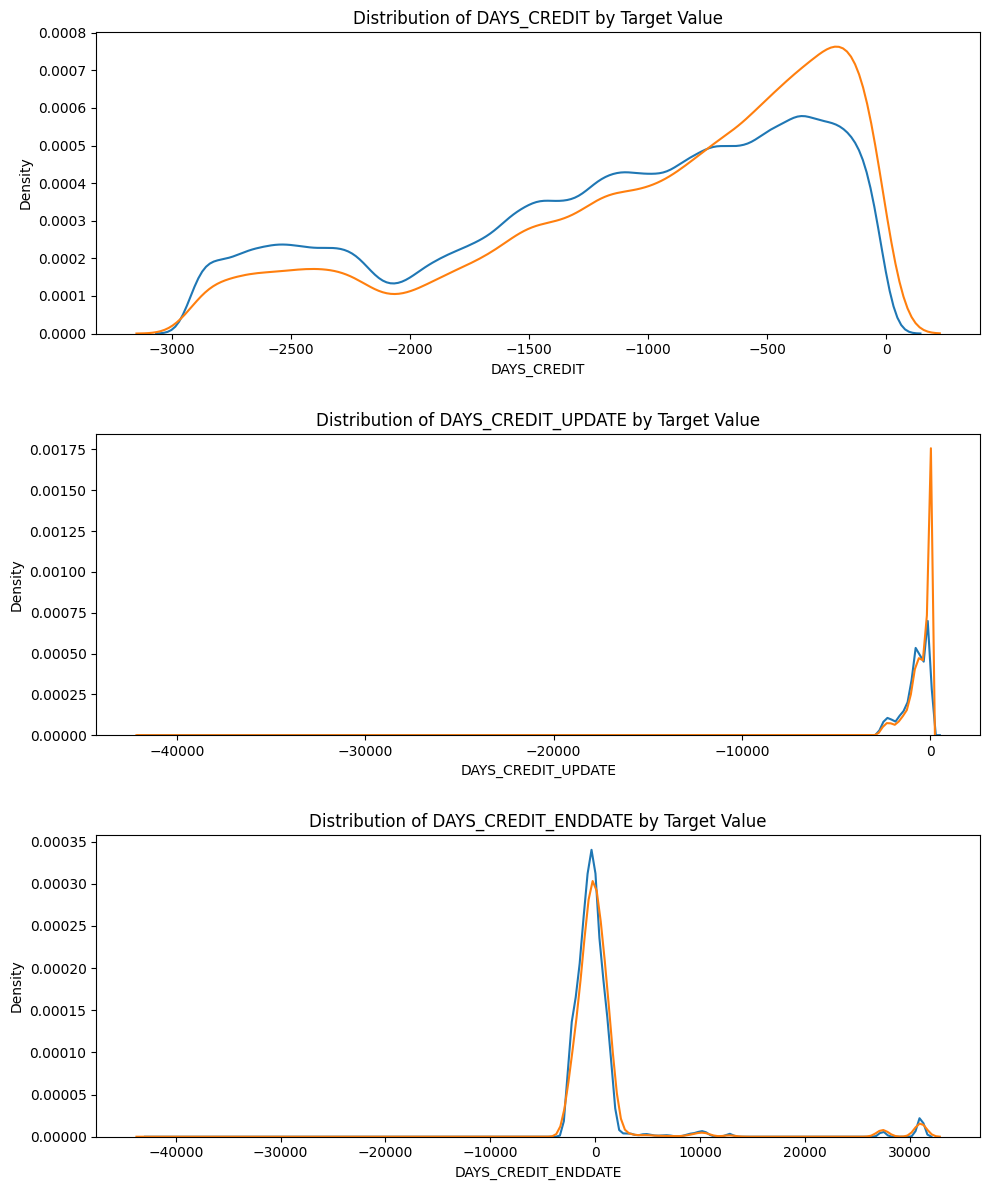

In [47]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(bureau.loc[bureau['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(bureau.loc[bureau['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

Above we performed similar procedures on the data that we did on the application data. We can see that days_credit has a relatively strong postive correlation with the target. Credit_active_closed also have a fairly strong correlation, albeit negative. It's a bit surprising that 'closed' would have a higher negative correlation that something like 'bad debt' or 'sold'.

# <a id='8'>8. Bureau Balance Data</a>

In [48]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head(30)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [49]:
# Add target column to data
bureau_bal = pd.merge(bureau_balance, bureau[["SK_ID_BUREAU","TARGET"]], on="SK_ID_BUREAU", how="outer")
bureau_bal.head(30)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,TARGET
0,5715448,0.0,C,0.0
1,5715448,-1.0,C,0.0
2,5715448,-2.0,C,0.0
3,5715448,-3.0,C,0.0
4,5715448,-4.0,C,0.0
5,5715448,-5.0,C,0.0
6,5715448,-6.0,C,0.0
7,5715448,-7.0,C,0.0
8,5715448,-8.0,C,0.0
9,5715448,-9.0,0,0.0


In [50]:
# Group by SK_ID_BUREAU and calculate the count of each STATUS
bb_grouped = bureau_bal.groupby(['SK_ID_BUREAU', 'TARGET'])['STATUS'].value_counts().unstack().reset_index().fillna(0)

bb_grouped.sample(20, random_state=100)

STATUS,SK_ID_BUREAU,TARGET,0,1,2,3,4,5,C,X
117275,5509075,0.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0
225419,5928568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,12.0
93323,5388646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
479570,6691558,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
243969,5976995,0.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
65249,5242801,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69309,5268671,0.0,9.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0
165314,5731246,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104325,5436994,0.0,6.0,3.0,0.0,0.0,0.0,0.0,35.0,0.0
11978,5045201,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The above information is interesting. I've grouped the bureau_balance by the sk_id_bureau number and added up the values of different payment statuses for a given client. We can see how many months an account was in a delinquent status before it was closed, for instance. 

In [51]:
# Find correlations with the target and sort
bureau_balance_correlations = bb_grouped.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', bureau_balance_correlations.tail(10))
print('\nMost Negative Correlations:\n', bureau_balance_correlations.head(10))

Most Positive Correlations:
 STATUS
C              -0.047547
0              -0.023443
X              -0.020382
SK_ID_BUREAU   -0.007133
5               0.005917
2               0.008434
3               0.008954
4               0.009768
1               0.016930
TARGET          1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 STATUS
C              -0.047547
0              -0.023443
X              -0.020382
SK_ID_BUREAU   -0.007133
5               0.005917
2               0.008434
3               0.008954
4               0.009768
1               0.016930
TARGET          1.000000
Name: TARGET, dtype: float64


The correlation information isn't as useful. We can see a greater number of months with 'closed' status is correlated with more missed payments in our target variable, but it's our to derive meaning from this because it seems like once you have a closed account with this bureau each month adds a new entry regardless.

# <a id='9'>9. Credit Card Balance Data</a>

In [52]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [53]:
credit_card_balance.shape

(3840312, 23)

In [54]:
# Add taget to data
credit_card_balance = pd.merge(credit_card_balance, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")

In [55]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in credit_card_balance:
    if credit_card_balance[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(credit_card_balance[col].unique())) <= 2:
            # Train on the training data
            le.fit(credit_card_balance[col])
            # Transform both training and testing data
            credit_card_balance[col] = le.transform(credit_card_balance[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
credit_card_balance = pd.get_dummies(credit_card_balance)

print('Training Features shape: ', credit_card_balance.shape)

0 columns were label encoded.
Training Features shape:  (3840312, 30)


In [56]:
# Find correlations with the target and sort
credit_card_balance_correlations = credit_card_balance.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', credit_card_balance_correlations.tail(10))
print('\nMost Negative Correlations:\n', credit_card_balance_correlations.head(10))

Most Positive Correlations:
 CNT_DRAWINGS_POS_CURRENT    0.029536
MONTHS_BALANCE              0.035695
CNT_DRAWINGS_CURRENT        0.037793
CNT_DRAWINGS_ATM_CURRENT    0.038437
AMT_INST_MIN_REGULARITY     0.039798
AMT_RECEIVABLE_PRINCIPAL    0.049692
AMT_RECIVABLE               0.049803
AMT_TOTAL_RECEIVABLE        0.049839
AMT_BALANCE                 0.050098
TARGET                      1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 CNT_INSTALMENT_MATURE_CUM            -0.023684
NAME_CONTRACT_STATUS_Completed       -0.004917
SK_ID_CURR                           -0.004617
NAME_CONTRACT_STATUS_Sent proposal   -0.001491
NAME_CONTRACT_STATUS_Signed          -0.001026
NAME_CONTRACT_STATUS_Approved        -0.000345
NAME_CONTRACT_STATUS_Refused          0.000580
SK_DPD                                0.001684
SK_ID_PREV                            0.002571
CNT_DRAWINGS_OTHER_CURRENT            0.003044
Name: TARGET, dtype: float64


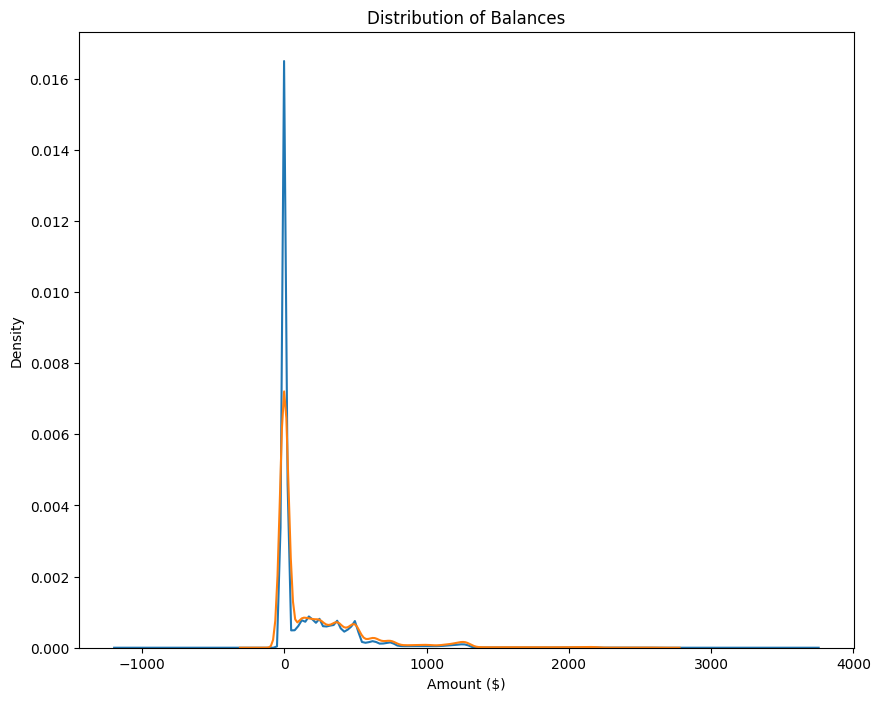

In [57]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(credit_card_balance.loc[credit_card_balance['TARGET'] == 0, 'AMT_BALANCE'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(credit_card_balance.loc[credit_card_balance['TARGET'] == 1, 'AMT_BALANCE'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Amount ($)'); plt.ylabel('Density'); plt.title('Distribution of Balances');

Not much surprising here. The strongest correlation with our target variable is the amt_balance, which is to say those with higher credit balances missed loan payments more often.

# <a id='10'>10. POS Cash Balance Data</a>

In [58]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [59]:
# Add target to data
pcb = pd.merge(pcb, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")

In [60]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in pcb:
    if pcb[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(pcb[col].unique())) <= 2:
            # Train on the training data
            le.fit(pcb[col])
            # Transform both training and testing data
            pcb[col] = le.transform(pcb[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
pcb = pd.get_dummies(pcb)

print('Training Features shape: ', pcb.shape)

0 columns were label encoded.
Training Features shape:  (10001358, 17)


In [61]:
# Find correlations with the target and sort
pcb_correlations = pcb.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', pcb_correlations.tail(10))
print('\nMost Negative Correlations:\n', pcb_correlations.head(10))

Most Positive Correlations:
 NAME_CONTRACT_STATUS_Signed                   0.001669
NAME_CONTRACT_STATUS_Returned to the store    0.002596
NAME_CONTRACT_STATUS_Demand                   0.006062
NAME_CONTRACT_STATUS_Amortized debt           0.006732
SK_DPD_DEF                                    0.008594
SK_DPD                                        0.009866
CNT_INSTALMENT                                0.018506
MONTHS_BALANCE                                0.020147
CNT_INSTALMENT_FUTURE                         0.021972
TARGET                                        1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 SK_ID_CURR                                   -0.002245
NAME_CONTRACT_STATUS_Active                  -0.001915
NAME_CONTRACT_STATUS_XNA                     -0.000136
SK_ID_PREV                                   -0.000056
NAME_CONTRACT_STATUS_Approved                 0.000170
NAME_CONTRACT_STATUS_Completed                0.000412
NAME_CONTRACT_STATUS_Canceled   

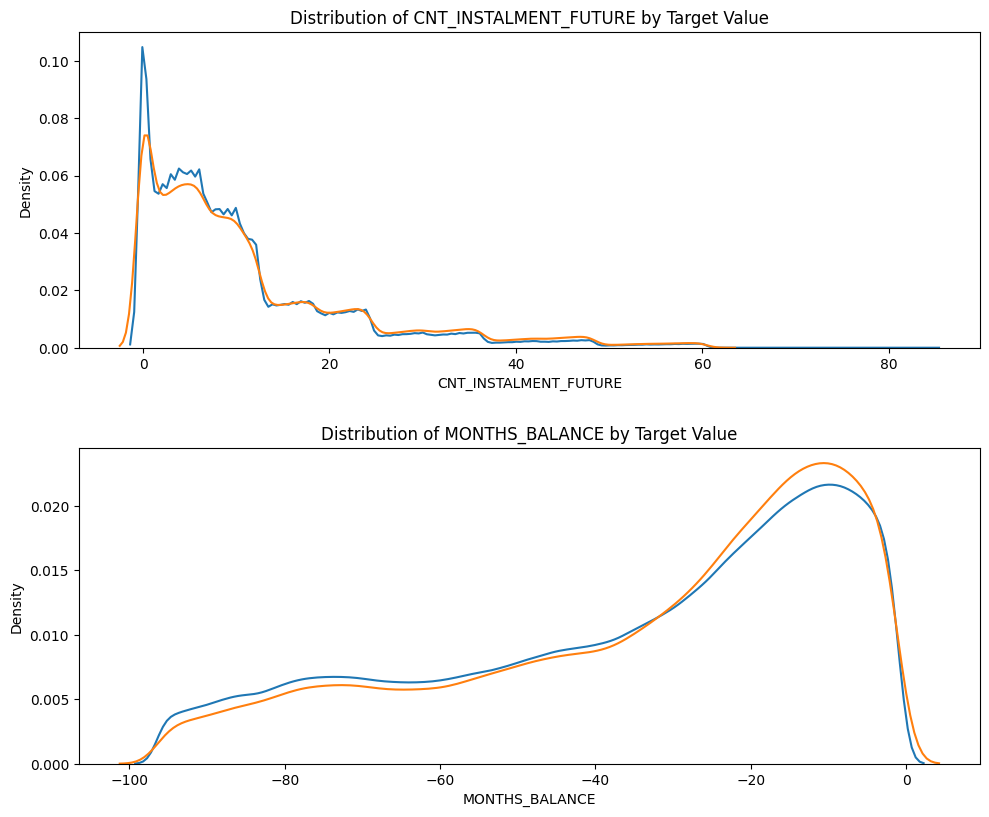

In [62]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['CNT_INSTALMENT_FUTURE','MONTHS_BALANCE']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(pcb.loc[pcb['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(pcb.loc[pcb['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

Even less to see with the POS cash balance. Some really minor correlations, the strongest being cnt_installment_future, indicating the clients with more payments remainingon other credit may have a harder time making payments on a new loan.

# <a id='11'>11. Previous Application Data</a>

In [63]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
t = previous_application['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

trace = go.Pie(labels=labels, values=values,
               hoverinfo='value', textinfo='percent',
               textfont=dict(size=12),
               marker=dict(line=dict(color='#fff', width=2)))

layout = go.Layout(title='Name Contract Status in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Here we can see the breakdown of the results of all previous applications.

In [65]:
# Add target to the data
previous_application = pd.merge(previous_application, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")

In [66]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in previous_application:
    if previous_application[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(previous_application[col].unique())) <= 2:
            # Train on the training data
            le.fit(previous_application[col])
            # Transform both training and testing data
            previous_application[col] = le.transform(previous_application[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
previous_application = pd.get_dummies(previous_application)

print('Training Features shape: ', previous_application.shape)

1 columns were label encoded.
Training Features shape:  (1670214, 164)


In [67]:
# Find correlations with the target and sort
previous_application_correlations = previous_application.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', previous_application_correlations.tail(10))
print('\nMost Negative Correlations:\n', previous_application_correlations.head(10))

Most Positive Correlations:
 RATE_INTEREST_PRIVILEGED                  0.028640
NAME_GOODS_CATEGORY_XNA                   0.029541
CNT_PAYMENT                               0.030480
CODE_REJECT_REASON_HC                     0.037158
CODE_REJECT_REASON_SCOFR                  0.038432
DAYS_DECISION                             0.039901
NAME_PRODUCT_TYPE_walk-in                 0.042842
NAME_CONTRACT_STATUS_Refused              0.054458
TARGET                                    1.000000
NAME_GOODS_CATEGORY_House Construction         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 CODE_REJECT_REASON_XAP                      -0.052015
NAME_CONTRACT_STATUS_Approved               -0.049161
DAYS_FIRST_DRAWING                          -0.031154
NAME_PORTFOLIO_POS                          -0.030791
NAME_CONTRACT_TYPE_Consumer loans           -0.029940
HOUR_APPR_PROCESS_START                     -0.027809
NAME_YIELD_GROUP_low_normal                 -0.026615
RATE_DOWN_PAYMENT       

We have a strong candidate for negative correlation in code_reject_reason XAP. Unfortunately, after some investigation, it looks like this categorization means something like 'NA', so much information there. Name_contract_status refused has a relatively high positive correlation, which would roughly translate to, 'trust your first instinct' in terms of making loans.

# <a id='12'>12. Installments Payments Data</a>

In [68]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [69]:
print(installments_payments.shape)

(13605401, 8)


In [70]:
# Add target to the data
installments_payments = pd.merge(installments_payments, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")

In [71]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in installments_payments:
    if installments_payments[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(installments_payments[col].unique())) <= 2:
            # Train on the training data
            le.fit(installments_payments[col])
            # Transform both training and testing data
            installments_payments[col] = le.transform(installments_payments[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
installments_payments = pd.get_dummies(installments_payments)

print('Training Features shape: ', installments_payments.shape)

0 columns were label encoded.
Training Features shape:  (13605401, 9)


In [72]:
# Find correlations with the target and sort
installments_payments_correlations =installments_payments.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n',installments_payments_correlations.tail(10))
print('\nMost Negative Correlations:\n',installments_payments_correlations.head(10))

Most Positive Correlations:
 NUM_INSTALMENT_NUMBER    -0.016190
NUM_INSTALMENT_VERSION   -0.009896
AMT_PAYMENT              -0.003623
SK_ID_CURR               -0.002540
AMT_INSTALMENT           -0.001498
SK_ID_PREV               -0.000212
DAYS_INSTALMENT           0.034974
DAYS_ENTRY_PAYMENT        0.035122
TARGET                    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 NUM_INSTALMENT_NUMBER    -0.016190
NUM_INSTALMENT_VERSION   -0.009896
AMT_PAYMENT              -0.003623
SK_ID_CURR               -0.002540
AMT_INSTALMENT           -0.001498
SK_ID_PREV               -0.000212
DAYS_INSTALMENT           0.034974
DAYS_ENTRY_PAYMENT        0.035122
TARGET                    1.000000
Name: TARGET, dtype: float64


Not much interesting here other than days_entry_payment and days_installment, which I understand are the days since the previous balance was paid off and when it was supposed to be paid off, respectively. This would be more interesting if there were a significant delta between the two, but as it is, it's mostly just a subtle suggestion that those who have had more time since their last credit pay offs, may be slightly less capable of making loan payments now.

Text(0.5, 0, 'years')

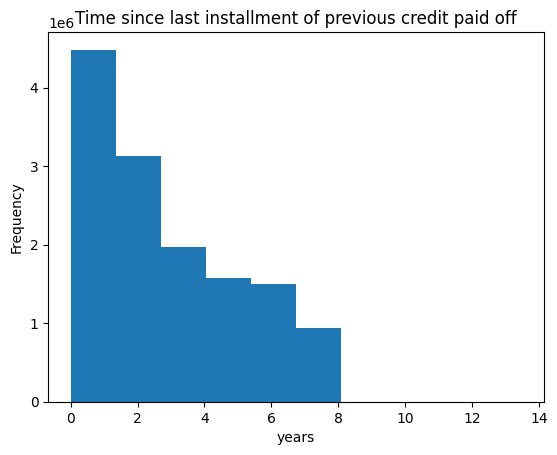

In [73]:
(installments_payments['DAYS_ENTRY_PAYMENT'] / -365).plot.hist(title="Time since last installment of previous credit paid off")
plt.xlabel("years")

# <a id='13'>13. Conclusion</a>

In conclusion, best information lies in the application dataset, though there are a few pieces of information from other files to keep in mind for feature engineering. Of those data in the application table, ext_sources 1, 2, and 3 will be, by far, the most useful. Other data like days_birth (age) and days_employment (days employed) will also be helpful. As we noticed in the case of days_employment it will be important to be on the lookout for anomalous data.

It is worth keeping bias in mind. The main area where I could see bias creeping in is through the ext_sources. While 'what you see is what you get' with the internal information provided by Home Credit, we don't know what is taken into account by the external sources; it could include biasing information about race, sex, or some other category of which we'd like to be mindful.

In [75]:
! jupyter nbconvert eda.ipynb --to html_toc --TagRemovePreprocessor.remove_cell_tags='{"hide_code"}'

[NbConvertApp] Converting notebook eda.ipynb to html_toc
[NbConvertApp] Writing 2323723 bytes to eda.html
